### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 

### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.

In [2]:
coupons_data = pd.read_csv('Downloads/coupons.csv')

In [3]:
coupons_data.head()

destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1           Coffee House         2h  Female  21  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3           Coffee House         2h  Female  21  Unmarried partner  ...   
4           Coffee House         1d  Female  21  Unmarried partner  ...   

   CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0        never       NaN                  4~8              1~3   
1        never       NaN                  4~8              1~3   
2        never       NaN                  4~8              1~3   
3        never       NaN                  4~8              1~3   
4        never       NaN                  4~8              1~3   

  toCoupon_GEQ5min toCoupon_GEQ15min toCoupon_GEQ25min direction_same  \
0                1                 0                 0              0   
1                1                 0                 0              0   
2                1                 1                 0              0   
3                1                 1                 0              0   
4                1                 1                 0              0   

  direction_opp  Y  
0             1  1  
1             1  0  
2             1  1  
3             1  0  
4             1  0  

[5 rows x 26 columns]

In [4]:
# Exploring the data, lets start by describing the dataframe to get a list of provided attributes/features
coupons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [5]:
#Column name clean-up using the Rename method in Pandas
coupons_data.rename(columns={"RestaurantLessThan20": "less_expensive_restaurant", "Restaurant20To50": "more_expensive_restaurant"},inplace = True)

In [6]:
#Check if the renamed columns are reflected in the dataframe attributes
coupons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   destination                12684 non-null  object
 1   passanger                  12684 non-null  object
 2   weather                    12684 non-null  object
 3   temperature                12684 non-null  int64 
 4   time                       12684 non-null  object
 5   coupon                     12684 non-null  object
 6   expiration                 12684 non-null  object
 7   gender                     12684 non-null  object
 8   age                        12684 non-null  object
 9   maritalStatus              12684 non-null  object
 10  has_children               12684 non-null  int64 
 11  education                  12684 non-null  object
 12  occupation                 12684 non-null  object
 13  income                     12684 non-null  object
 14  car   

2. Investigate the dataset for missing or problematic data.

In [7]:
# Identify where there is Missing data
pd.isnull(coupons_data).head()

destination  passanger  weather  temperature   time  coupon  expiration  \
0        False      False    False        False  False   False       False   
1        False      False    False        False  False   False       False   
2        False      False    False        False  False   False       False   
3        False      False    False        False  False   False       False   
4        False      False    False        False  False   False       False   

   gender    age  maritalStatus  ...  CoffeeHouse  CarryAway  \
0   False  False          False  ...        False       True   
1   False  False          False  ...        False       True   
2   False  False          False  ...        False       True   
3   False  False          False  ...        False       True   
4   False  False          False  ...        False       True   

   less_expensive_restaurant  more_expensive_restaurant  toCoupon_GEQ5min  \
0                      False                      False             False   
1                      False                      False             False   
2                      False                      False             False   
3                      False                      False             False   
4                      False                      False             False   

   toCoupon_GEQ15min  toCoupon_GEQ25min  direction_same  direction_opp      Y  
0              False              False           False          False  False  
1              False              False           False          False  False  
2              False              False           False          False  False  
3              False              False           False          False  False  
4              False              False           False          False  False  

[5 rows x 26 columns]

In [8]:
#Column names with Missing data - Check the number of null columns
missing_values = coupons_data.isnull().sum()
print(missing_values[missing_values > 0].index.tolist())
print(missing_values)

['car', 'Bar', 'CoffeeHouse', 'CarryAway', 'less_expensive_restaurant', 'more_expensive_restaurant']
destination                      0
passanger                        0
weather                          0
temperature                      0
time                             0
coupon                           0
expiration                       0
gender                           0
age                              0
maritalStatus                    0
has_children                     0
education                        0
occupation                       0
income                           0
car                          12576
Bar                            107
CoffeeHouse                    217
CarryAway                      151
less_expensive_restaurant      130
more_expensive_restaurant      189
toCoupon_GEQ5min                 0
toCoupon_GEQ15min                0
toCoupon_GEQ25min                0
direction_same                   0
direction_opp                    0
Y                       

#### Missing Data - 
Most of the records in the car column seem to be empty. I will drop this column as it has insufficient data
After dropping this column 'car', I will explore if there are any other missing values across columns and after evaluating the nature and number of records, will explore whether to drop or fill null values.

In [9]:
#Explore Object dtype columns to identify any problematic data on irrelevant attributes/features
for i in coupons_data.select_dtypes('object').columns:
    print(i, coupons_data[i].unique())


destination ['No Urgent Place' 'Home' 'Work']
passanger ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
weather ['Sunny' 'Rainy' 'Snowy']
time ['2PM' '10AM' '6PM' '7AM' '10PM']
coupon ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
expiration ['1d' '2h']
gender ['Female' 'Male']
age ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
maritalStatus ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
education ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
occupation ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 'Office & Administrative Support'
 'Constr

#### Problematic Data -

-> Data in columns Income, Bar, CoffeeHouse, CarryAway, less_expensive_restaurant, more_expensive_restaurant contains non-integer values ( alphanumeric, special characters) which might be harder to do correlation exploration. So,I would like to convert these columns into categorical data by assigning integer mappings. 

-> Age column also have alphanumeric values. So, I would like to assign values for '50plus' and 'below21' to convert it into integer data type.  

In [10]:
#Explore Object dtype columns to identify any problematic data on irrelevant attributes/features
for i in coupons_data.select_dtypes('int').columns:
    print(i, coupons_data[i].unique())

temperature [55 80 30]
has_children [1 0]
toCoupon_GEQ5min [1]
toCoupon_GEQ15min [0 1]
toCoupon_GEQ25min [0 1]
direction_same [0 1]
direction_opp [1 0]
Y [1 0]


In [62]:
#Check correlation among columns to identify any irrelevant attributes
coupons_data_corr_matrix = coupons_data.corr(numeric_only=True)
coupons_data_corr_matrix

temperature  has_children  toCoupon_GEQ5min  \
temperature           1.000000     -0.019716               NaN   
has_children         -0.019716      1.000000               NaN   
toCoupon_GEQ5min           NaN           NaN               NaN   
toCoupon_GEQ15min    -0.155332      0.078211               NaN   
toCoupon_GEQ25min    -0.216254     -0.013722               NaN   
direction_same        0.097085     -0.031620               NaN   
direction_opp        -0.097085      0.031620               NaN   
Y                     0.061240     -0.045557               NaN   

                   toCoupon_GEQ15min  toCoupon_GEQ25min  direction_same  \
temperature                -0.155332          -0.216254        0.097085   
has_children                0.078211          -0.013722       -0.031620   
toCoupon_GEQ5min                 NaN                NaN             NaN   
toCoupon_GEQ15min           1.000000           0.324984       -0.303533   
toCoupon_GEQ25min           0.324984           1.000000       -0.192319   
direction_same             -0.303533          -0.192319        1.000000   
direction_opp               0.303533           0.192319       -1.000000   
Y                          -0.081602          -0.103633        0.014570   

                   direction_opp         Y  
temperature            -0.097085  0.061240  
has_children            0.031620 -0.045557  
toCoupon_GEQ5min             NaN       NaN  
toCoupon_GEQ15min       0.303533 -0.081602  
toCoupon_GEQ25min       0.192319 -0.103633  
direction_same         -1.000000  0.014570  
direction_opp           1.000000 -0.014570  
Y                      -0.014570  1.000000

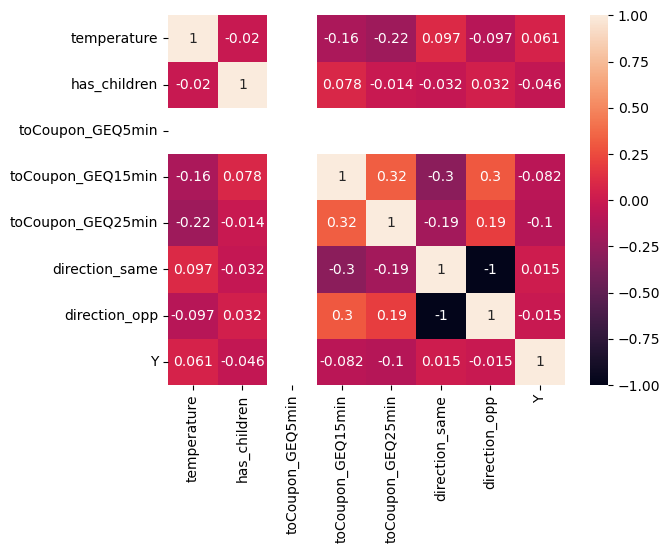

In [12]:
#Correlation matrix plot as a heatmap to visualize the correlation
sns.heatmap(coupons_data_corr_matrix, annot=True)
plt.show()

#### Irrelevant attributes - 

--> The values in Column direction_opp seem to be exact opposite of values in direction_same. So, I will drop Column direction_opp
--> All values in column toCoupon_GEQ5min seem to be 1 without any variation. So, this can also be dropped. This indicates that the min. driving distance to Bar/either of the Restaurant types is 5. 

3. Decide what to do about your missing data -- drop, replace, other...

In [13]:
# Missing data - Drop car column and drop records that have null values
clean_coupons_data = coupons_data.drop(columns=['car']).dropna()
clean_coupons_data.shape[0]

12079

In [14]:
clean_coupons_data.isnull().sum()

destination                  0
passanger                    0
weather                      0
temperature                  0
time                         0
coupon                       0
expiration                   0
gender                       0
age                          0
maritalStatus                0
has_children                 0
education                    0
occupation                   0
income                       0
Bar                          0
CoffeeHouse                  0
CarryAway                    0
less_expensive_restaurant    0
more_expensive_restaurant    0
toCoupon_GEQ5min             0
toCoupon_GEQ15min            0
toCoupon_GEQ25min            0
direction_same               0
direction_opp                0
Y                            0
dtype: int64

In [15]:
# There are no null values, but need to check on columns with zero values.
# we can see that there are some records with zero values
Zero_values = clean_coupons_data.eq("0").any() | clean_coupons_data.eq(0).any()
Zero_values

destination                  False
passanger                    False
weather                      False
temperature                  False
time                         False
coupon                       False
expiration                   False
gender                       False
age                          False
maritalStatus                False
has_children                  True
education                    False
occupation                   False
income                       False
Bar                          False
CoffeeHouse                  False
CarryAway                    False
less_expensive_restaurant    False
more_expensive_restaurant    False
toCoupon_GEQ5min             False
toCoupon_GEQ15min             True
toCoupon_GEQ25min             True
direction_same                True
direction_opp                 True
Y                             True
dtype: bool

In [16]:
#Drop irrelevant attributes - toCoupon_GEQ5min and direction_opp
clean_coupons_data = clean_coupons_data.drop(columns=['direction_opp','toCoupon_GEQ5min'])
clean_coupons_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12079 entries, 22 to 12683
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   destination                12079 non-null  object
 1   passanger                  12079 non-null  object
 2   weather                    12079 non-null  object
 3   temperature                12079 non-null  int64 
 4   time                       12079 non-null  object
 5   coupon                     12079 non-null  object
 6   expiration                 12079 non-null  object
 7   gender                     12079 non-null  object
 8   age                        12079 non-null  object
 9   maritalStatus              12079 non-null  object
 10  has_children               12079 non-null  int64 
 11  education                  12079 non-null  object
 12  occupation                 12079 non-null  object
 13  income                     12079 non-null  object
 14  Bar  

In [17]:
#Problematic data - Categorical Mapping
#Add Categorical mappings to convert some of the key attribute columns such as Income, Bar, CoffeeHouse, CarryAway, less_expensive_restaurant, more_expensive_restaurant to Integer dtype.

#Map Income data
clean_coupons_data['Income_category'] = clean_coupons_data['income'].map({
     'Less than $12500': 0,
    '$12500 - $24999': 1,
    '$25000 - $37499': 2,
    '$37500 - $49999': 3,
    '$50000 - $62499': 4,
    '$62500 - $74999': 5,
    '$75000 - $87499': 6,
    '$87500 - $99999': 7,
    '$100000 or More': 8
})
clean_coupons_data['Income_category'].value_counts()

2    1919
1    1728
8    1692
3    1689
4    1565
0    1014
5     840
7     818
6     814
Name: Income_category, dtype: int64

In [18]:
#Map Bar data
clean_coupons_data['Bar_category'] = clean_coupons_data['Bar'].map({
    'never': 0,
    'less1': 1,
    '1~3': 2,
    '4~8': 3,
    'gt8': 4
})
clean_coupons_data['Bar_category'].value_counts()

0    4934
1    3394
2    2370
3    1054
4     327
Name: Bar_category, dtype: int64

In [19]:
#Map CoffeeHouse data
clean_coupons_data['CoffeeHouse_category'] = clean_coupons_data['CoffeeHouse'].map({
    'never': 0,
    'less1': 1,
    '1~3': 2,
    '4~8': 3,
    'gt8': 4
})
clean_coupons_data['CoffeeHouse_category'].value_counts()

1    3298
2    3159
0    2852
3    1659
4    1111
Name: CoffeeHouse_category, dtype: int64

In [20]:
#Map CarryAway data
clean_coupons_data['CarryAway_category'] = clean_coupons_data['CarryAway'].map({
    'never': 0,
    'less1': 1,
    '1~3': 2,
    '4~8': 3,
    'gt8': 4
})
clean_coupons_data['CarryAway_category'].value_counts()

2    4502
3    4083
1    1790
4    1573
0     131
Name: CarryAway_category, dtype: int64

In [21]:
#Map less expensive restaurant data
clean_coupons_data['less_expensive_restaurant_category'] = clean_coupons_data['less_expensive_restaurant'].map({
    'never': 0,
    'less1': 1,
    '1~3': 2,
    '4~8': 3,
    'gt8': 4
})
clean_coupons_data['less_expensive_restaurant_category'].value_counts()

2    5163
3    3450
1    2005
4    1285
0     176
Name: less_expensive_restaurant_category, dtype: int64

In [22]:
#Map more expensive restaurant data
clean_coupons_data['more_expensive_restaurant_category'] = clean_coupons_data['more_expensive_restaurant'].map({
    'never': 0,
    'less1': 1,
    '1~3': 2,
    '4~8': 3,
    'gt8': 4
})
clean_coupons_data['more_expensive_restaurant_category'].value_counts()

1    5859
2    3202
0    2070
3     684
4     264
Name: more_expensive_restaurant_category, dtype: int64

In [23]:
# Problematic data - part 2 - Age column
#Use function to assign numeric values to records that have '50plus' and 'below21' data
# Convert age values to integers
def age_convert(age):
    if age == "50plus":
        return 51  
    elif age == "below21":
        return 20  
    else:
        return int(age)  
    
# Apply to the 'age' column
clean_coupons_data['age'] = clean_coupons_data['age'].apply(age_convert)
clean_coupons_data['age'].value_counts()

21    2537
26    2399
31    1925
51    1732
36    1253
41    1065
46     664
20     504
Name: age, dtype: int64

In [24]:
clean_coupons_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12079 entries, 22 to 12683
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   destination                         12079 non-null  object
 1   passanger                           12079 non-null  object
 2   weather                             12079 non-null  object
 3   temperature                         12079 non-null  int64 
 4   time                                12079 non-null  object
 5   coupon                              12079 non-null  object
 6   expiration                          12079 non-null  object
 7   gender                              12079 non-null  object
 8   age                                 12079 non-null  int64 
 9   maritalStatus                       12079 non-null  object
 10  has_children                        12079 non-null  int64 
 11  education                           12079 non-null  o

In [61]:
#Correlation matrix on clean data set
clean_coupons_data_corr_matrix = clean_coupons_data.corr(numeric_only= True)
clean_coupons_data_corr_matrix

temperature       age  has_children  \
temperature                            1.000000 -0.015425     -0.020674   
age                                   -0.015425  1.000000      0.435988   
has_children                          -0.020674  0.435988      1.000000   
toCoupon_GEQ15min                     -0.155876  0.041031      0.079735   
toCoupon_GEQ25min                     -0.215780 -0.001394     -0.014038   
direction_same                         0.097539 -0.029945     -0.033047   
Y                                      0.056646 -0.056601     -0.048333   
Income_category                       -0.026463  0.076436      0.098848   
Bar_category                           0.002075 -0.173980     -0.205094   
CoffeeHouse_category                  -0.016783 -0.047172      0.036041   
CarryAway_category                     0.012090 -0.066252     -0.065068   
less_expensive_restaurant_category     0.031073  0.005288     -0.033423   
more_expensive_restaurant_category    -0.027650  0.001838     -0.010207   

                                    toCoupon_GEQ15min  toCoupon_GEQ25min  \
temperature                                 -0.155876          -0.215780   
age                                          0.041031          -0.001394   
has_children                                 0.079735          -0.014038   
toCoupon_GEQ15min                            1.000000           0.325558   
toCoupon_GEQ25min                            0.325558           1.000000   
direction_same                              -0.305952          -0.192784   
Y                                           -0.081711          -0.100542   
Income_category                              0.022580          -0.007360   
Bar_category                                -0.024969          -0.002960   
CoffeeHouse_category                        -0.002818          -0.002395   
CarryAway_category                          -0.010294          -0.005220   
less_expensive_restaurant_category          -0.011945          -0.010368   
more_expensive_restaurant_category          -0.009138          -0.013254   

                                    direction_same         Y  Income_category  \
temperature                               0.097539  0.056646        -0.026463   
age                                      -0.029945 -0.056601         0.076436   
has_children                             -0.033047 -0.048333         0.098848   
toCoupon_GEQ15min                        -0.305952 -0.081711         0.022580   
toCoupon_GEQ25min                        -0.192784 -0.100542        -0.007360   
direction_same                            1.000000  0.014361        -0.025300   
Y                                         0.014361  1.000000        -0.028862   
Income_category                          -0.025300 -0.028862         1.000000   
Bar_category                             -0.002573  0.072649         0.042983   
CoffeeHouse_category                     -0.005211  0.112868        -0.020616   
CarryAway_category                       -0.003445  0.036913         0.025463   
less_expensive_restaurant_category       -0.010125  0.037051         0.109281   
more_expensive_restaurant_category       -0.008713  0.073151         0.167148   

                                    Bar_category  CoffeeHouse_category  \
temperature                             0.002075             -0.016783   
age                                    -0.173980             -0.047172   
has_children                           -0.205094              0.036041   
toCoupon_GEQ15min                      -0.024969             -0.002818   
toCoupon_GEQ25min                      -0.002960             -0.002395   
direction_same                         -0.002573             -0.005211   
Y                                       0.072649              0.112868   
Income_category                         0.042983             -0.020616   
Bar_category                            1.000000              0.252088   
CoffeeHouse_category                    0.252

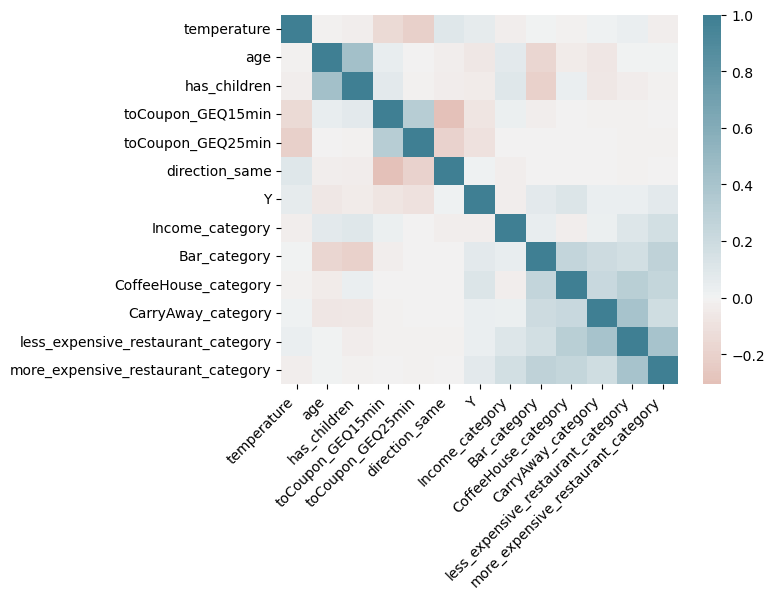

In [26]:
#Correlation matrix plot as a heatmap to visualize the correlation
ax = sns.heatmap(
 clean_coupons_data_corr_matrix, 
    center=0,
    cmap=sns.diverging_palette(20, 220, n=200)
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.show()

4. What proportion of the total observations chose to accept the coupon? 

In [27]:
Accepted_coupons = clean_coupons_data.query('Y == 1')
Rejected_coupons = clean_coupons_data.query('Y == 0')

Proportion_of_Accepted_coupons = Accepted_coupons.shape[0]/clean_coupons_data.shape[0]
Proportion_of_Rejected_coupons = Rejected_coupons.shape[0]/clean_coupons_data.shape[0]

print("Accepted Coupons - ", Accepted_coupons.shape[0],',',round(Proportion_of_Accepted_coupons*100,3),"%")
print("Rejected Coupons - ", Rejected_coupons.shape[0],',',round(Proportion_of_Rejected_coupons*100,3),"%")

Accepted Coupons -  6877 , 56.934 %
Rejected Coupons -  5202 , 43.066 %


5. Use a bar plot to visualize the `coupon` column.

In [99]:
px.histogram(clean_coupons_data,x="Y", y="coupon",color="passanger", title="Bar Chart of Coupons Accepted", barmode = 'group',labels={'Y':'Coupons Accepted','coupon':'Type of Coupon'})

6. Use a histogram to visualize the temperature column.

In [161]:
px.histogram(clean_coupons_data, x="temperature",histnorm='probability',barmode = 'group',labels={'temperature':'Temperature'}, # can specify one label per df column
                   opacity=0.8,nbins=8,
                   color ="coupon",pattern_shape="Y",title="Probability ranges of temperatures")

#### Interpreting the plot on Coupon Acceptance Vs. Rejection - based on the overall (5000ft) review:

- The likehood of the driver to use the coupon is higher in comparison to them rejecting a coupon.
- Passangers who ae traveling Alone seem to have a higher acceptance rate on coupon across the board over all other passanger types
- Sunny Weather and warmer temperatures seem to have higher acceptance rate for coupons


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [30]:
Bar_coupons_data = clean_coupons_data.query('coupon == "Bar"')
Bar_coupons_data

destination  passanger weather  temperature  time coupon  \
24     No Urgent Place  Friend(s)   Sunny           80  10AM    Bar   
35                Home      Alone   Sunny           55   6PM    Bar   
39                Work      Alone   Sunny           55   7AM    Bar   
46     No Urgent Place  Friend(s)   Sunny           80  10AM    Bar   
57                Home      Alone   Sunny           55   6PM    Bar   
...                ...        ...     ...          ...   ...    ...   
12663  No Urgent Place  Friend(s)   Sunny           80  10PM    Bar   
12664  No Urgent Place  Friend(s)   Sunny           55  10PM    Bar   
12667  No Urgent Place      Alone   Rainy           55  10AM    Bar   
12670  No Urgent Place    Partner   Rainy           55   6PM    Bar   
12682             Work      Alone   Snowy           30   7AM    Bar   

      expiration gender  age maritalStatus  ...  toCoupon_GEQ15min  \
24            1d   Male   21        Single  ...                  0   
35            1d   Male   21        Single  ...                  0   
39            1d   Male   21        Single  ...                  1   
46            1d   Male   46        Single  ...                  0   
57            1d   Male   46        Single  ...                  0   
...          ...    ...  ...           ...  ...                ...   
12663         1d   Male   26        Single  ...                  1   
12664         2h   Male   26        Single  ...                  1   
12667         1d   Male   26        Single  ...                  1   
12670         2h   Male   26        Single  ...                  1   
12682         1d   Male   26        Single  ...                  1   

      toCoupon_GEQ25min direction_same  Y Income_category Bar_category  \
24                    0              0  1               5            0   
35                    0              1  1               5            0   
39                    1              0  1               5            0   
46                    0              0  0               1            0   
57                    0              1  0               1            0   
...                 ...            ... ..             ...          ...   
12663                 0              0  0               6            0   
12664                 0              0  0               6            0   
12667                 0              0  0               6            0   
12670                 0              0  0               6            0   
12682                 1              0  0               6            0   

      CoffeeHouse_category CarryAway_category  \
24                       1                  3   
35                       1                  3   
39                       1                  3   
46                       3                  2   
57                       3                  2   
...                    ...                ...   
12663                    0                  2   
12664                    0                  2   
12667                    0                  2   
12670                    0                  2   
12682                    0                  2   

      less_expensive_restaurant_category  more_expensive_restaurant_category  
24                                     3                                   1  
35                                     3                                   1  
39                                     3                                   1  
46                                     2                                   0  
57                                     2                                   0  
...                                  ...                                 ...  
12663                                  3                                   2  
12664                                  3                                   2  
12667                                  3                                   2  
12670                                  3         

2. What proportion of bar coupons were accepted?

In [31]:
Accepted_Bar_coupons = Bar_coupons_data.query('Y == 1')
Rejected_Bar_coupons = Bar_coupons_data.query('Y == 0')

Proportion_of_Accepted_bar_coupons = Accepted_Bar_coupons.shape[0]/Bar_coupons_data.shape[0]
Proportion_of_Rejected_bar_coupons = Rejected_Bar_coupons.shape[0]/Bar_coupons_data.shape[0]

print("Accepted Coupons - ", Accepted_Bar_coupons.shape[0],',',round(Proportion_of_Accepted_bar_coupons*100,3),"%")
print("Rejected Coupons - ", Rejected_Bar_coupons.shape[0],',',round(Proportion_of_Rejected_bar_coupons*100,3),"%")

Accepted Coupons -  788 , 41.192 %
Rejected Coupons -  1125 , 58.808 %


In [32]:
#Bar plot to visualize the proportion of accepted vs. rejected coupons
px.bar(Bar_coupons_data, x="Y", y="Bar_category", color ="Y", title="Bar Chart of Coupons Accepted vs. Rejected")


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.

In [33]:
Few_Bar_visits = Accepted_Bar_coupons.query('Bar_category < 3')
More_Bar_visits = Accepted_Bar_coupons.query('Bar_category > 2')
print("Acceptance rate on Few Bar Visits =", Few_Bar_visits.shape[0],',',round((Few_Bar_visits.shape[0]/Accepted_Bar_coupons.shape[0])*100,2),'%')
print("Acceptance rate on More Bar Visits =", More_Bar_visits.shape[0],',',round((More_Bar_visits.shape[0]/Accepted_Bar_coupons.shape[0])*100,2),'%')

Acceptance rate on Few Bar Visits = 641 , 81.35 %
Acceptance rate on More Bar Visits = 147 , 18.65 %


In [121]:
px.histogram(Bar_coupons_data,x="Bar",color ='Y', title="Bar Coupons Acceptance vs. Rejection rates", barmode = 'group')

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?

In [35]:
Bar_visit_over_25 = Accepted_Bar_coupons.query('Bar_category > 1 and age > 25')
Bar_visit_all_others = Accepted_Bar_coupons.shape[0] - Bar_visit_over_25.shape[0]
print("Acceptance rate for Drivers who go to bar more than once a month and age > 25 =", Bar_visit_over_25.shape[0],',',round((Bar_visit_over_25.shape[0]/Accepted_Bar_coupons.shape[0])*100,2),'%')
print("Acceptance rate for all other drivers =", Bar_visit_all_others,',',round((Bar_visit_all_others/Accepted_Bar_coupons.shape[0])*100,2),'%')

Acceptance rate for Drivers who go to bar more than once a month and age > 25 = 278 , 35.28 %
Acceptance rate for all other drivers = 510 , 64.72 %


In [163]:
px.box(Accepted_Bar_coupons,y="Bar_category", x="time",color="age", title="Box plot of Coupons Accepted - Time/Age")

In [180]:
#fig = px.bar(Accepted_Bar_coupons, y="age", x="weather",color="temperature", title="Box Plot of Coupons Accepted - Driver age/weather", labels={'age':'Driver Age'})
px.bar(Bar_coupons_data, y="income", x="weather",color="age", title="Facetted Bar Plot of Coupon Acceptance/Rejection by Income/weather/driver age", labels={'age':'Driver Age'},
             facet_col="Bar_category",facet_row = "Y",
             category_orders={"Barcoupon_category": ["0", "1","2","3","4"],
                             "direction" : ["0","1"]})

In [120]:
px.density_heatmap(Bar_coupons_data,y="Y", x="age", title="Heatmap of Coupons Acceptance by Age", marginal_x="histogram", marginal_y="histogram")


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 

In [38]:
Bar_visits_passanger_occupation = Accepted_Bar_coupons.query('Bar_category > 1 and passanger !="Kid(s)" and occupation != "Farming Fishing & Forestry"')
Bar_visits_passanger_occupation_all_others = Accepted_Bar_coupons.shape[0] -Bar_visits_passanger_occupation.shape[0]
print("Acceptance rate for Drivers who go to bar more than once a month with passanger and occupation filters =",Bar_visits_passanger_occupation.shape[0],',',round((Bar_visits_passanger_occupation.shape[0]/Accepted_Bar_coupons.shape[0])*100,2),'%')
print("Acceptance rate for all other drivers =", Bar_visits_passanger_occupation_all_others,',',round((Bar_visits_passanger_occupation_all_others/Accepted_Bar_coupons.shape[0])*100,2),'%')

Acceptance rate for Drivers who go to bar more than once a month with passanger and occupation filters = 376 , 47.72 %
Acceptance rate for all other drivers = 412 , 52.28 %


In [39]:
px.bar(Accepted_Bar_coupons, x="Bar_category", y="passanger",color="occupation", title="Bar Plot of Coupons Accepted - Passanger/Occupation")


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 


In [40]:
Bar_visits_passanger_maritalstatus = Accepted_Bar_coupons.query('Bar_category > 1 and passanger !="Kid(s)" and maritalStatus !="Widowed"')
Bar_visits_age_under_30 = Accepted_Bar_coupons.query('Bar_category > 1 and age < 30')
Bar_visits_restaurant_income = Accepted_Bar_coupons.query('less_expensive_restaurant_category > 2 and Income_category < 4' )
print("Acceptance rate for Drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed =",Bar_visits_passanger_maritalstatus.shape[0],',',round((Bar_visits_passanger_maritalstatus.shape[0]/Accepted_Bar_coupons.shape[0])*100,2),'%')
print("Acceptance rate for Drivers who go to bars more than once a month and are under the age of 30 =", Bar_visits_age_under_30.shape[0],',',round((Bar_visits_age_under_30.shape[0]/Accepted_Bar_coupons.shape[0])*100,2),'%')
print("Acceptance rate for Drivers who go to cheap restaurants more than 4 times a month and income is less than 50K. =", Bar_visits_restaurant_income.shape[0],',',round(( Bar_visits_restaurant_income.shape[0]/Accepted_Bar_coupons.shape[0])*100,2),'%')

Acceptance rate for Drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed = 376 , 47.72 %
Acceptance rate for Drivers who go to bars more than once a month and are under the age of 30 = 236 , 29.95 %
Acceptance rate for Drivers who go to cheap restaurants more than 4 times a month and income is less than 50K. = 152 , 19.29 %


In [119]:
px.violin(Bar_coupons_data, color="Y", x="passanger",y="maritalStatus", title="Violin Plot of Coupons Accepted - Passanger/Marital Status",labels={'Y':'Coupon Acceptance /Rejection'})


In [42]:
px.box(Accepted_Bar_coupons, y="age", x="Bar_category",color="passanger", title="Box Plot of Coupons Accepted - Passanger/Age", labels={'age':'Driver Age'})


In [115]:
px.bar(Accepted_Bar_coupons, x="expiration",color="passanger", title="Box Plot of Coupons Accepted based on expiration")

In [116]:
px.bar(Accepted_Bar_coupons, y="income", x="less_expensive_restaurant_category",color="time", title="Bar Plot of cheap restaurant visits - Income/Time")


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

#### Bar coupon acceptance rate -

1. Higher for Drivers who are less frequent in visiting Bar's. (80%)
2. Higher acceptance rate at 6PM time 
3. More users between ages 21-31 have higher acceptance rates and also for users over 50.
4. Most drivers prefer to go to the Bar when the weather is sunny
5. Bar coupons have a higher acceptance rate at 6PM and 10PM and users are less likely to visit the bar during 7AM, 10AM, and 2PM
6. Drivers with Kids tend to vist Bar 4-8 times in a month.
7. Drivers with low income or very high income tend to accept more coupons
8. Drivers prefer coupons that expire in a day vs. the ones that expire in 2hrs and these are mosyly passangers that are Alone.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [45]:
#Visualize the coupon acceptance vs rejection rates across all coupon types
px.histogram(clean_coupons_data, y='coupon',color ='Y',text_auto=True, title="Bar Chart of Coupons Accepted vs. Rejected by coupon type")

#### The maximum coupons offered are for Coffee House. So, I would like to continue my independent investigation on the Coffee House coupon category and analyze the characteristics of drivers who accept these coupons.

**Investigating the CoffeeHouse Coupons**

Now, we will lead you through an exploration of just the CoffeeHouse related coupons.  

1. Create a new `DataFrame` that contains just the CoffeeHouse coupons.

In [46]:
CoffeeHouse_coupons_data = clean_coupons_data.query('coupon == "Coffee House"')
CoffeeHouse_coupons_data

destination  passanger weather  temperature  time        coupon  \
23     No Urgent Place  Friend(s)   Sunny           80  10AM  Coffee House   
26     No Urgent Place  Friend(s)   Sunny           80   2PM  Coffee House   
27     No Urgent Place  Friend(s)   Sunny           80   2PM  Coffee House   
28     No Urgent Place  Friend(s)   Sunny           80   2PM  Coffee House   
30     No Urgent Place  Friend(s)   Sunny           80   6PM  Coffee House   
...                ...        ...     ...          ...   ...           ...   
12656             Home      Alone   Snowy           30  10PM  Coffee House   
12659             Work      Alone   Snowy           30   7AM  Coffee House   
12674             Home      Alone   Rainy           55  10PM  Coffee House   
12675             Home      Alone   Snowy           30  10PM  Coffee House   
12681             Work      Alone   Snowy           30   7AM  Coffee House   

      expiration gender  age    maritalStatus  ...  toCoupon_GEQ15min  \
23            2h   Male   21           Single  ...                  0   
26            1d   Male   21           Single  ...                  0   
27            2h   Male   21           Single  ...                  1   
28            1d   Male   21           Single  ...                  1   
30            2h   Male   21           Single  ...                  0   
...          ...    ...  ...              ...  ...                ...   
12656         2h   Male   31  Married partner  ...                  1   
12659         1d   Male   31  Married partner  ...                  0   
12674         2h   Male   26           Single  ...                  0   
12675         2h   Male   26           Single  ...                  1   
12681         1d   Male   26           Single  ...                  0   

      toCoupon_GEQ25min direction_same  Y Income_category Bar_category  \
23                    0              0  0               5            0   
26                    0              0  0               5            0   
27                    0              0  0               5            0   
28                    0              0  0               5            0   
30                    0              0  0               5            0   
...                 ...            ... ..             ...          ...   
12656                 0              0  0               8            1   
12659                 0              1  0               8            1   
12674                 0              1  0               6            0   
12675                 0              0  0               6            0   
12681                 0              1  0               6            0   

      CoffeeHouse_category CarryAway_category  \
23                       1                  3   
26                       1                  3   
27                       1                  3   
28                       1                  3   
30                       1                  3   
...                    ...                ...   
12656                    0                  3   
12659                    0                  3   
12674                    0                  2   
12675                    0                  2   
12681                    0                  2   

      less_expensive_restaurant_category  more_expensive_restaurant_category  
23                                     3                                   1  
26                                     3                                   1  
27                                     3                                   1  
28                                     3                                   1  
30                                     3                                   1  
...                                  ...                                 ...  
12656                                  4                                   1  
12659                                  4                                   1  
12674   

2. What proportion of bar coupons were accepted?

In [47]:
Accepted_CoffeeHouse_coupons = CoffeeHouse_coupons_data.query('Y == 1')
Rejected_CoffeeHouse_coupons = CoffeeHouse_coupons_data.query('Y == 0')

Proportion_of_Accepted_CoffeeHouse_coupons = Accepted_CoffeeHouse_coupons.shape[0]/CoffeeHouse_coupons_data.shape[0]
Proportion_of_Rejected_CoffeeHouse_coupons = Rejected_CoffeeHouse_coupons.shape[0]/CoffeeHouse_coupons_data.shape[0]

print("Accepted Coffee House Coupons - ", Accepted_CoffeeHouse_coupons.shape[0],',',round(Proportion_of_Accepted_CoffeeHouse_coupons*100,3),"%")
print("Rejected Coffee House Coupons - ", Rejected_CoffeeHouse_coupons.shape[0],',',round(Proportion_of_Rejected_CoffeeHouse_coupons*100,3),"%")

Accepted Coffee House Coupons -  1894 , 49.633 %
Rejected Coffee House Coupons -  1922 , 50.367 %


In [48]:
px.histogram(clean_coupons_data.query('coupon == "Coffee House"'), y='coupon',color ='Y',text_auto=True, title="Bar Chart of Coupons Accepted vs. Rejected ")

#### Uni-variate analysis
3. Compare the acceptance rate based on their frequency of Coffee House Visits - 3 of fewer times a month to those who went for more times

In [49]:
Few_CoffeeHouse_visits = Accepted_CoffeeHouse_coupons.query('CoffeeHouse_category < 3')
More_CoffeeHouse_visits = Accepted_CoffeeHouse_coupons.query('CoffeeHouse_category > 2')
print("Acceptance rate on Few CoffeeHouse Visits =", Few_CoffeeHouse_visits.shape[0],',',round((Few_CoffeeHouse_visits.shape[0]/Accepted_CoffeeHouse_coupons.shape[0])*100,2),'%')
print("Acceptance rate on More CoffeeHouse Visits =", More_CoffeeHouse_visits.shape[0],',',round((More_CoffeeHouse_visits.shape[0]/Accepted_CoffeeHouse_coupons.shape[0])*100,2),'%')

Acceptance rate on Few CoffeeHouse Visits = 1323 , 69.85 %
Acceptance rate on More CoffeeHouse Visits = 571 , 30.15 %


In [118]:
#Visualize the Frequency of coffee house visits 
px.histogram(CoffeeHouse_coupons_data,x="CoffeeHouse", color='Y', title="Coffee House Coupons Accepted", barmode = 'group')

#### Bivariate analysis
4. Compare the acceptance rate between drivers who go to the Coffee House more than once a month and during morning time vs. other times in the day?

In [51]:
CoffeeHouse_Visit_atleast_once_AM = Accepted_CoffeeHouse_coupons.query('CoffeeHouse_category > 1 and time == ["7AM","10AM"]')
CoffeeHouse_Visit_atleast_once_PM = Accepted_CoffeeHouse_coupons.query('CoffeeHouse_category > 1 and time != ["7AM","10AM"]')
print("Acceptance rate on AM visits =", CoffeeHouse_Visit_atleast_once_AM.shape[0],',',round((CoffeeHouse_Visit_atleast_once_AM.shape[0]/Accepted_CoffeeHouse_coupons.shape[0])*100,2),'%')
print("Acceptance rate on PM Visits =", CoffeeHouse_Visit_atleast_once_PM.shape[0],',',round((CoffeeHouse_Visit_atleast_once_PM.shape[0]/Accepted_CoffeeHouse_coupons.shape[0])*100,2),'%')

Acceptance rate on AM visits = 578 , 30.52 %
Acceptance rate on PM Visits = 653 , 34.48 %


In [135]:
px.box(CoffeeHouse_coupons_data,y="CoffeeHouse",x='time', color='Y', title="Coffee House visits by time")

#### Bi-Variate analysis
5. Compare the acceptance rate between drivers who go to the Coffee House more than once a month when the weather is sunny vs colder weathers

In [53]:
CoffeeHouse_Visit_atleast_once_hot = Accepted_CoffeeHouse_coupons.query('CoffeeHouse_category > 1 and weather == ["Sunny"]')
CoffeeHouse_Visit_atleast_once_cool = Accepted_CoffeeHouse_coupons.query('CoffeeHouse_category > 1 and weather != ["Sunny"]')
print("Acceptance rate on hot weather visits =", CoffeeHouse_Visit_atleast_once_hot.shape[0],',',round((CoffeeHouse_Visit_atleast_once_hot.shape[0]/Accepted_CoffeeHouse_coupons.shape[0])*100,2),'%')
print("Acceptance rate on cold weather Visits =", CoffeeHouse_Visit_atleast_once_cool.shape[0],',',round((CoffeeHouse_Visit_atleast_once_cool.shape[0]/Accepted_CoffeeHouse_coupons.shape[0])*100,2),'%')

Acceptance rate on hot weather visits = 1097 , 57.92 %
Acceptance rate on cold weather Visits = 134 , 7.07 %


In [144]:
px.violin(Accepted_CoffeeHouse_coupons,y="CoffeeHouse", color='weather',points= 'all', title="Coffee House visits by weather")

#### Multi-Variate analysis
5. Compare the acceptance rate between drivers who go to the Coffee House more than once a month on their way to work and when they are alone/with friend(s) vs.all other categories

In [55]:
CoffeeHouse_Visit_atleast_once_work_passanger = Accepted_CoffeeHouse_coupons.query('CoffeeHouse_category > 1 and destination =="Work" and passanger == ["Alone","Friend(s)"]')
CoffeeHouse_Visit_all_others = Accepted_CoffeeHouse_coupons.shape[0] - CoffeeHouse_Visit_atleast_once_work_passanger.shape[0]
print("Acceptance rate on on the way to work and with a friend/alone =", CoffeeHouse_Visit_atleast_once_work_passanger.shape[0],',',round((CoffeeHouse_Visit_atleast_once_work_passanger.shape[0]/Accepted_CoffeeHouse_coupons.shape[0])*100,2),'%')
print("Acceptance rate for all others =", CoffeeHouse_Visit_all_others,',',round((CoffeeHouse_Visit_all_others/Accepted_CoffeeHouse_coupons.shape[0])*100,2),'%')

Acceptance rate on on the way to work and with a friend/alone = 252 , 13.31 %
Acceptance rate for all others = 1642 , 86.69 %


In [158]:
px.histogram(Accepted_CoffeeHouse_coupons,y="passanger", color='destination', title="Accepted coupons -Coffee House visits by passanger/destination")

In [159]:
px.histogram(Rejected_CoffeeHouse_coupons,y="passanger", color='destination', title="Rejected coupons - Coffee House visits by passanger/destination")

#### Multi-Variate analysis
6. Compare the acceptance rate between drivers who go to -

- Marital status is single, and occupation is student
- Coffee House more than once a month, income is below 50K, and driving in the same direction
- Income is below 50K, and age is under 35
- Have had atleast 4 carry Away visits and age is above 30 years

In [65]:
CoffeeHouse_Visit_single_student = Accepted_CoffeeHouse_coupons.query('maritalStatus == "Single" and occupation == "Student"')
CoffeeHouse_Visit_atleast_once_lowincome_direction = Accepted_CoffeeHouse_coupons.query('CoffeeHouse_category > 1 and Income_category < 4 and direction_same == 1 ')
CoffeeHouse_Visit_income_age = Accepted_CoffeeHouse_coupons.query('Income_category < 4 and age < 35 ')
CoffeeHouse_Visit_more_carryaways_age_30 = Accepted_CoffeeHouse_coupons.query('CarryAway_category == 3 and age > 30 ')
print("Acceptance rate by single students =", CoffeeHouse_Visit_single_student.shape[0],',',round((CoffeeHouse_Visit_single_student.shape[0]/Accepted_CoffeeHouse_coupons.shape[0])*100,2),'%')
print("Acceptance rate by low income drivers driving in the same direction =", CoffeeHouse_Visit_atleast_once_lowincome_direction.shape[0],',',round((CoffeeHouse_Visit_atleast_once_lowincome_direction.shape[0]/Accepted_CoffeeHouse_coupons.shape[0])*100,2),'%')
print("Acceptance rate by driver income and age =", CoffeeHouse_Visit_income_age.shape[0],',',round((CoffeeHouse_Visit_income_age.shape[0]/Accepted_CoffeeHouse_coupons.shape[0])*100,2),'%')
print("Acceptance rate by frequent carry away drivers above 30 years age =", CoffeeHouse_Visit_more_carryaways_age_30.shape[0],',',round((CoffeeHouse_Visit_more_carryaways_age_30.shape[0]/Accepted_CoffeeHouse_coupons.shape[0])*100,2),'%')

Acceptance rate by single students = 179 , 9.45 %
Acceptance rate by low income drivers driving in the same direction = 144 , 7.6 %
Acceptance rate by driver income and age = 692 , 36.54 %
Acceptance rate by frequent carry away drivers above 30 years age = 340 , 17.95 %


In [58]:
#Visualize Coffee House Coupon acceptance rate by marital Status and occupation
px.bar(Accepted_CoffeeHouse_coupons,x="CoffeeHouse_category",y="occupation", color='maritalStatus', title="Coffee House visits by Marital Status/Occupation")

In [59]:
#Visualize Coffee House Coupon acceptance rate by Income and Driving Direction
px.histogram(Accepted_CoffeeHouse_coupons,y="CoffeeHouse_category",x="income", color='direction_same', title="Coffee House visits by Income/Driving Direction")

In [81]:
#Visualize Coffee House Coupon acceptance rate by driver income and age
sns.pairplot(
    Accepted_CoffeeHouse_coupons,
    x_vars=["Income_category", "age"],
    y_vars=["Income_category", "age"],
    hue = "maritalStatus", kind ="hist"
)

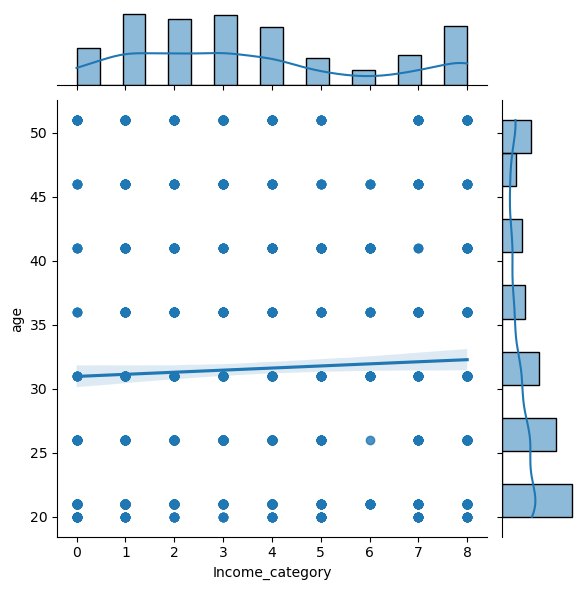

In [98]:
#Visualize income category and age vis a joint plot
sns.jointplot(data=Accepted_CoffeeHouse_coupons, x="Income_category", y="age", kind="reg")

In [87]:
#Visualize Coffee House Coupon acceptance rate by Age and carryAway
px.histogram(Accepted_CoffeeHouse_coupons,color="CarryAway", x='age',barmode = 'group', title="Coffee House visits by Age/CarryAway")


#### Coffee House coupon acceptance rate -

1. Higher acceptance rate for less frequent in visiting Coffee Houses.
2. Higher acceptance rate at 7AM,10Am, 2PM, and 6PM.
3. Passengers with No urgent travel destination and with Friends tend to get more coffee. 
4. Most drivers prefer to go to go have coffee when its Sunny.
5. Coupon acceptance is higher for students whose Marital status is single
6. Low income groups ( <50K) tend to have higher coupon acceptance rate even if it is in the opposite direction.
7. Drivers with low income or very high income tend to accept more coupons
8. Drivers prefer coupons that expire in a day vs. the ones that expire in 2hrs 
9. Higher acceptance rate for ages under 25 and who does atleast 1-3 Carry Away coupons